In [1]:
from helping_functions import get_min_max_values_xy_selected_slices, getting_2D_data_from_h5_filtered_np_xy_switched, dock_array_to_zero, create_single_grid_array, process_data_to_picturelike_structure
from slice_information import slice_numbers
import numpy as np
from PIL import Image
from scipy import ndimage
from scipy.interpolate import griddata
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [42]:
area_limit = 1500
intensity_limit = 1750
kernel_size = 5  # kernel size of the dilation kernel
n_grid_x, n_grid_y = 4, 4    # needs to be changed for different segmentation strategy
Multilayer = True  # needs to be switched to True if the surrounding layers should be added
int_area_switch = 0   # 0 if area is selected; 1 if intensity is selected

min_slice = 1
max_slice = 1200

In [64]:
h5_path = '/home/jan/Documents/Diplomarbeit/Trainingsdaten/ZPs/ZP1/ZP_1_full_part.h5'
part_name = 'ZP1_combined'
slice_name = 'Slice00101'

In [44]:
array = getting_2D_data_from_h5_filtered_np_xy_switched(h5_path, part_name, slice_name, intensity_limit, area_limit)

In [45]:
minX, minY, maxX, maxY = get_min_max_values_xy_selected_slices(h5_path, part_name, min_slice_num=min_slice,
                                                                   max_slice_num=max_slice, intensity_limit=intensity_limit,
                                                                   area_limit=area_limit)

In [46]:
length_x_part = maxX - minX
length_y_part = maxY - minY

In [47]:
length_x_part

1748

In [41]:
0.14+0.85*0.72

0.752

In [39]:
1260/1748

0.7208237986270023

In [48]:
array_docked = dock_array_to_zero(array, minX, minY)

In [49]:
array

array([[ 418, 1305,    0,  569],
       [ 423, 1310,  153,  748],
       [ 430, 1317,  306,  621],
       ...,
       [1161,  315,  507,  981],
       [1407,  541,  364,  870],
       [1273,  387,  436,  829]])

<function matplotlib.pyplot.show(*args, **kw)>

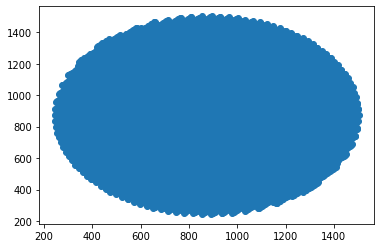

In [51]:
plt.scatter(array[:,0], array[:,1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

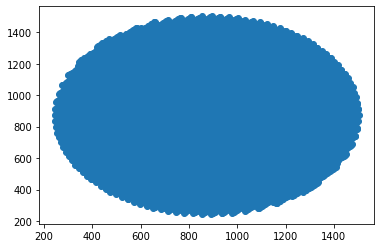

In [52]:
plt.scatter(array_docked[:,0], array_docked[:,1])
plt.show

(433.0, 1314.0, 433.0, 1314.0)

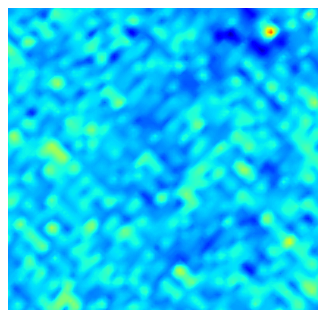

In [65]:
    min_square = int(0.248 * length_x_part)
    max_square = int(0.752 * length_x_part)
    # 0.15 and 0.85 are derived from pythagoras and sqrt of 2 when cutting the square out of the circle

    # just for tryout
    #min_square = 0
    #max_square = 1260

    #for num_slice in range(min_slice, max_slice+1):
    #print(num_slice)
    #slice_name = 'Slice' + str("{:05d}".format(num_slice))
    array_filtered_not_docked = getting_2D_data_from_h5_filtered_np_xy_switched(h5_path, part_name,
                                                            slice_name, intensity_limit,area_limit, show_info=False)
    array_filtered_docked = dock_array_to_zero(array_filtered_not_docked, minX, minY)

    # creating the actual image
    figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')

    x = array_filtered_docked[:, 0]
    y = array_filtered_docked[:, 1]
    z = array_filtered_docked[:, 2]

    xi = np.linspace(min_square, max_square, 100)
    yi = np.linspace(min_square, max_square, 100)
    zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
    cntr1 = plt.contourf(xi, yi, zi, levels=200, cmap="jet")
    plt.clim(0, area_limit)
    plt.axis('off')
    #plt.savefig('RGB_area_images/' + mode + '_ZP{}_{}'.format(ZP_number, slice_name) ,bbox_inches='tight', pad_inches=0)
    #plt.close()

(0.0, 1750.0, 0.0, 1750.0)

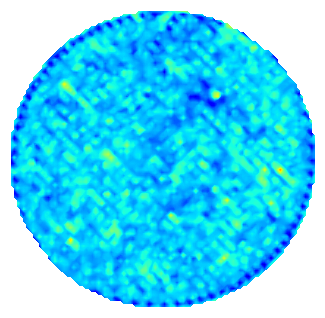

In [66]:
#min_square = int(0.248 * length_x_part)
#max_square = int(0.752 * length_x_part)
# 0.15 and 0.85 are derived from pythagoras and sqrt of 2 when cutting the square out of the circle

# just for tryout
min_square = 0
max_square = 1750

#for num_slice in range(min_slice, max_slice+1):
#print(num_slice)
#slice_name = 'Slice' + str("{:05d}".format(num_slice))
array_filtered_not_docked = getting_2D_data_from_h5_filtered_np_xy_switched(h5_path, part_name,
                                                        slice_name, intensity_limit,area_limit, show_info=False)
array_filtered_docked = dock_array_to_zero(array_filtered_not_docked, minX, minY)

# creating the actual image
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')

x = array_filtered_docked[:, 0]
y = array_filtered_docked[:, 1]
z = array_filtered_docked[:, 2]

xi = np.linspace(min_square, max_square, 100)
yi = np.linspace(min_square, max_square, 100)
zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
cntr1 = plt.contourf(xi, yi, zi, levels=200, cmap="jet")
plt.clim(0, area_limit)
plt.axis('off')